In [18]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import praw
from praw.models import MoreComments
from nltk.sentiment import SentimentIntensityAnalyzer as SIA

In [2]:
user_agent='Sheeba_Economic'
reddit= praw.Reddit(
    client_id="rszab0dBkcT7NdZr6MftpQ",
    client_secret="mBFjTSN3YXoSimkU7eZ1H0SoD-f2Yw",
    user_agent=user_agent)

In [7]:
posts = []
for submission in reddit.subreddit("Brics").top("all"):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, praw.models.MoreComments):
            continue
        posts.append(top_level_comment.body)
     

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_39486/138909273.py:2: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  for submission in reddit.subreddit("Brics").top("all"):


In [8]:
df = pd.DataFrame(posts, columns=["body"])

In [9]:
df

,body
0,Burn him with his flag 🤬
1,This plan is to kill the Petro Dollar run and ...
2,It’s difficult to know what’s going to come ou...
3,There is a lot to unpack as to what BRICS woul...
4,"Nice that you ""feel"" that way. That's what BRI..."
...,...
115,Well. I see it’s now been 9 years. Here’s the ...
116,BITCHES!\n\nLOL
117,"OK, not a trader. But I would think that if th..."
118,Lol the USA has the most gold reserves in th...


In [10]:
import string
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_string(text):
    # Lowercase the text
    text = text.lower()
    
    # Replace non-standard single quotation marks with regular single quotation marks
    text = text.replace('’', "'")
    
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F0D0-\U0001F0FF"  # Emoticons
                           u"\U0001F1E0-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U0001F200-\U0001F251"  # Enclosed Ideographic Supplement
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    
    # Remove line breaks
    text = text.replace('\n', ' ')
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Rejoin the words into a cleaned string
    cleaned_text = ' '.join(words)
    
    return cleaned_text



In [11]:
df['cleaned_tweets'] = df['body'].apply(clean_string)


In [12]:
df

,body,cleaned_tweets
0,Burn him with his flag 🤬,burn flag
1,This plan is to kill the Petro Dollar run and ...,plan kill petro dollar run manipulated western...
2,It’s difficult to know what’s going to come ou...,difficult know whats going come summit next we...
3,There is a lot to unpack as to what BRICS woul...,lot unpack brics would bring table officially ...
4,"Nice that you ""feel"" that way. That's what BRI...",nice feel way thats brics supped make feel lik...
...,...,...
115,Well. I see it’s now been 9 years. Here’s the ...,well see 9 years heres latest subject httpswww...
116,BITCHES!\n\nLOL,bitches lol
117,"OK, not a trader. But I would think that if th...",ok trader would think new currency starts lot ...
118,Lol the USA has the most gold reserves in th...,lol usa gold reserves world brics silly happen...


In [104]:
df2=df['cleaned_tweets']
df2

0                                              burn flag
1      plan kill petro dollar run manipulated western...
2      difficult know whats going come summit next we...
3      lot unpack brics would bring table officially ...
4      nice feel way thats brics supped make feel lik...
                             ...                        
115    well see 9 years heres latest subject httpswww...
116                                          bitches lol
117    ok trader would think new currency starts lot ...
118    lol usa gold reserves world brics silly happen...
119    brics generally acceptedthen currency becomes ...
Name: cleaned_tweets, Length: 120, dtype: object

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
value = [str(element) for element in df2]
vectorizer=CountVectorizer()
Xs  =  vectorizer.fit_transform(value)   
print(type(Xs))
print("vocabulary = ",vectorizer.vocabulary_)   
print("stop words =", vectorizer.stop_words)
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)

<class 'scipy.sparse._csr.csr_matrix'>
vocabulary =  {'burn': 357, 'flag': 905, 'plan': 1694, 'kill': 1284, 'petro': 1677, 'dollar': 693, 'run': 1974, 'manipulated': 1405, 'western': 2510, 'central': 395, 'banks': 249, 'controlled': 508, 'cabal': 364, 'brics': 335, 'replaced': 1896, 'fiat': 882, 'currency': 574, 'gold': 1011, 'tangible': 2261, 'asset': 205, 'value': 2446, 'supposedly': 2236, 'quantum': 1825, 'financial': 893, 'system': 2250, 'qfs': 1823, 'line': 1351, 'also': 133, 'backed': 232, 'banking': 248, 'setting': 2060, 'mankind': 1408, 'free': 944, 'slavery': 2116, 'control': 507, 'difficult': 669, 'know': 1293, 'whats': 2515, 'going': 1010, 'come': 453, 'summit': 2228, 'next': 1537, 'week': 2503, 'first': 902, 'announced': 152, 'introduction': 1222, 'goldback': 1012, 'intended': 1205, 'compete': 470, 'us': 2429, 'said': 1993, 'goldlinked': 1014, 'trade': 2339, 'settlement': 2062, 'course': 544, 'would': 2546, 'dedollarization': 613, 'effect': 733, 'theyre': 2298, 'saying': 20

In [19]:
sia = SIA()
results = []

for tweet in df['cleaned_tweets']:  
    polarity = sia.polarity_scores(tweet)
    polarity['cleaned_tweets'] = tweet  cores
    results.append(polarity)


sentiment_df = pd.DataFrame(results)
pprint(sentiment_df.head())

     neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.289  0.551  0.160   -0.8885   
2  0.039  0.939  0.022   -0.2732   
3  0.058  0.765  0.177    0.8748   
4  0.000  0.705  0.295    0.7269   

                                      cleaned_tweets  
0                                          burn flag  
1  plan kill petro dollar run manipulated western...  
2  difficult know whats going come summit next we...  
3  lot unpack brics would bring table officially ...  
4  nice feel way thats brics supped make feel lik...  


In [20]:
sentiment_df

,neg,neu,pos,compound,cleaned_tweets
0,0.000,1.000,0.000,0.0000,burn flag
1,0.289,0.551,0.160,-0.8885,plan kill petro dollar run manipulated western...
2,0.039,0.939,0.022,-0.2732,difficult know whats going come summit next we...
3,0.058,0.765,0.177,0.8748,lot unpack brics would bring table officially ...
4,0.000,0.705,0.295,0.7269,nice feel way thats brics supped make feel lik...
...,...,...,...,...,...
115,0.000,0.741,0.259,0.2732,well see 9 years heres latest subject httpswww...
116,0.582,0.000,0.418,-0.2732,bitches lol
117,0.080,0.826,0.093,0.2039,ok trader would think new currency starts lot ...
118,0.000,0.651,0.349,0.5994,lol usa gold reserves world brics silly happen...


In [29]:
sentiment_df['label']= 0
sentiment_df['label'] = np.where(sentiment_df['compound'] > 0, 1, sentiment_df['label'])  # Set 'label' to 1 where 'compound' > 0.2
sentiment_df['label'] = np.where(sentiment_df['compound'] < 0, -1, sentiment_df['label'])  # Set 'label' to -1 where 'compound' < -0.2

sentiment_df.head()

,neg,neu,pos,compound,cleaned_tweets,label
0,0.000,1.000,0.000,0.0000,burn flag,0
1,0.289,0.551,0.160,-0.8885,plan kill petro dollar run manipulated western...,-1
2,0.039,0.939,0.022,-0.2732,difficult know whats going come summit next we...,-1
3,0.058,0.765,0.177,0.8748,lot unpack brics would bring table officially ...,1
4,0.000,0.705,0.295,0.7269,nice feel way thats brics supped make feel lik...,1


In [30]:
finaldf=sentiment_df[['cleaned_tweets', 'label']]

In [31]:
finaldf=pd.DataFrame(finaldf)

<class 'scipy.sparse._csr.csr_matrix'>
vocabulary =  {'neg': 3, 'neu': 4, 'pos': 5, 'compound': 1, 'cleaned_tweets': 0, 'label': 2}
stop words = None
col_names= ['cleaned_tweets' 'compound' 'label' 'neg' 'neu' 'pos']


In [32]:
finaldf

,cleaned_tweets,label
0,burn flag,0
1,plan kill petro dollar run manipulated western...,-1
2,difficult know whats going come summit next we...,-1
3,lot unpack brics would bring table officially ...,1
4,nice feel way thats brics supped make feel lik...,1
...,...,...
115,well see 9 years heres latest subject httpswww...,1
116,bitches lol,-1
117,ok trader would think new currency starts lot ...,1
118,lol usa gold reserves world brics silly happen...,1


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame with 'text' and 'label' columns
X = finaldf['cleaned_tweets']  # Text data
Y = finaldf['label']  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0., random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))


Train data    :(96,)
Test data     :(24,)
Train Output  :(96,)
Test Output   :(24,)
Valid Train data    :(12,)
Valid Test data     :(12,)
Valid Train Output  :(12,)
Valid Test Output   :(12,)


In [42]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
x_train_valid_tfidf= tfidf_vectorizer.transform(x_train_valid)


In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# training data
y_pred_train = mnb.predict(X_train_tfidf)

# testing data
y_pred_test = mnb.predict(X_test_tfidf)

#validation
y_pred_val = mnb.predict(x_train_valid_tfidf)




In [79]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average="micro")
recall_train = recall_score(y_train, y_pred_train, average="micro")
f1_train = f1_score(y_train, y_pred_train, average="micro")

print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision Score:", precision_train)
print("Recall Score:", recall_train)
print("F1 Score:", f1_train)

Training Set Metrics:
Accuracy: 0.6354166666666666
Precision Score: 0.6354166666666666
Recall Score: 0.6354166666666666
F1 Score: 0.6354166666666666


In [80]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average="micro")
recall_test = recall_score(y_test, y_pred_test, average="micro")
f1_test = f1_score(y_test, y_pred_test, average="micro")

print("Testing Set Metrics:")
print("Accuracy:", accuracy_train*100)
print("Precision Score:", precision_train*100)
print("Recall Score:", recall_train*100)
print("F1 Score:", f1_train*100)

Testing Set Metrics:
Accuracy: 63.541666666666664
Precision Score: 63.541666666666664
Recall Score: 63.541666666666664
F1 Score: 63.541666666666664


In [81]:
#accuracy_validation = accuracy_score(y_train_valid, y_pred_val)
#precision_validation = precision_score(y_train_valid, y_pred_val, average="micro")
#recall_validation = recall_score(y_train_valid, y_pred_val, average="micro")
#f1_validation = f1_score(y_train_valid, y_pred_val, average="micro")

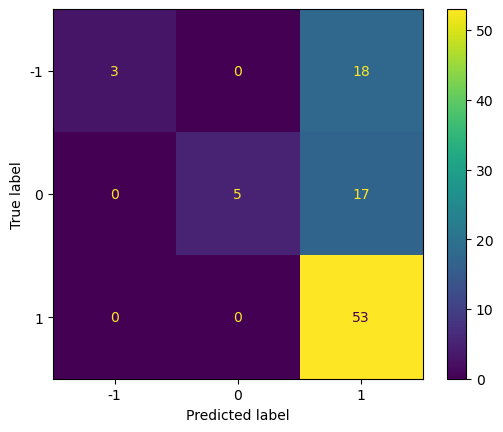

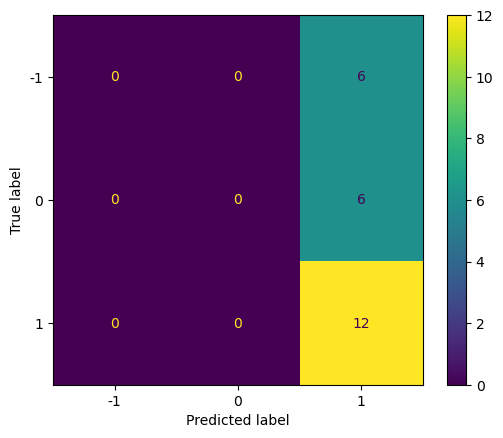

In [82]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)